# Import Libraries Used

In [104]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from mpl_toolkits.mplot3d import Axes3D
from Utilities.plot import histvstarget, distribution

# Import the Data

In [105]:
data_info = pd.DataFrame({
    "Attributes": ["Pregnancies", "Glucose", "BloodPressure", 
              "SkinThickness", "Insulin", "BMI", 
              "DiabetesPedigreeFunction", "Age", "Outcome"],
    "Explanation": ["Number of times pregnant", 
                 "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", 
                 "Diastolic blood pressure (mm Hg)", 
                "Triceps skin fold thickness (mm)", 
                 "2-Hour serum insulin (mu U/ml)",
                 "Body mass index (weight in kg/(height in m)^2)", 
              "Diabetes pedigree function"
                 ,"years",
                   "Diabetes or not"]})

data = pd.read_csv('input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
data_info

,Attributes,Explanation
0,Pregnancies,Number of times pregnant
1,Glucose,Plasma glucose concentration a 2 hours in an o...
2,BloodPressure,Diastolic blood pressure (mm Hg)
3,SkinThickness,Triceps skin fold thickness (mm)
4,Insulin,2-Hour serum insulin (mu U/ml)
5,BMI,Body mass index (weight in kg/(height in m)^2)
6,DiabetesPedigreeFunction,Diabetes pedigree function
7,Age,years
8,Outcome,Diabetes or not


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploring the Data

## Missing values

In [108]:
data.isnull().sum() # Number of missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values: Great!

## Pregnancies

### Distribution

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

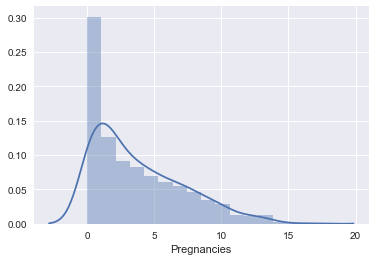

In [109]:
distribution("Pregnancies", data)
data["Pregnancies"].describe()

Distribution is positively skewed. 

### Relationship to outcome

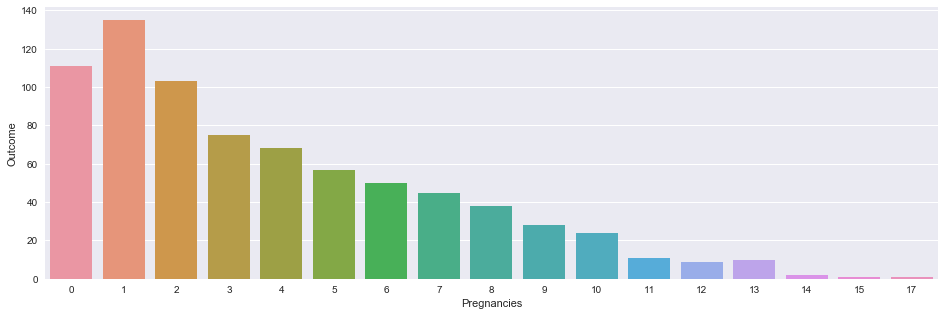

In [110]:
histvstarget("Pregnancies", "Outcome",data)

The outcome of diabetes seems to decrease with number of pregnancies.

## Glucose

### Distribution

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

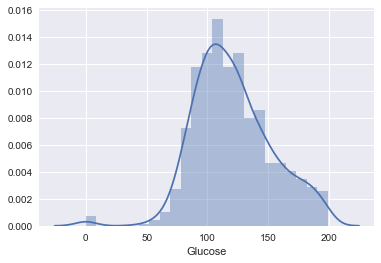

In [111]:
distribution("Glucose", data)
data["Glucose"].describe()

Again positivly skewed with outliers to the left. Those zeros might be missing values, a Glucose concentration of 0 is unrealistic. Lets mark them with NaN instead.

In [112]:
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["Glucose"].isnull().sum() # Number of missing values.

5

### Relationship to outcome

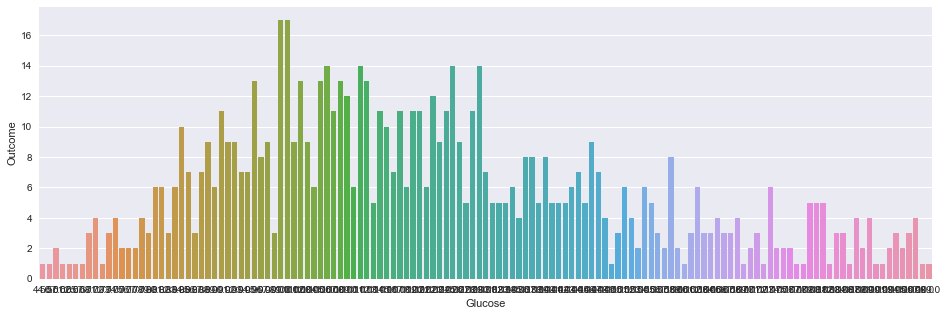

In [113]:
histvstarget("Glucose", "Outcome",data)

Very uniform with some kind of center of mass to the left, can't draw any conclusion by eye.

## BloodPressure

### Distribution

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

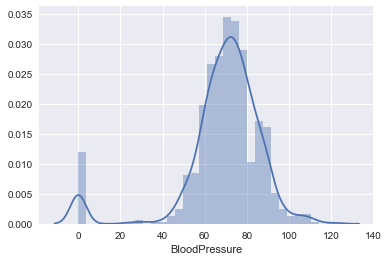

In [114]:
distribution("BloodPressure", data)
data["BloodPressure"].describe()

Looks fairly normal but a blood pressure of 0 occurs. This is probably a missing value since you cant have a blood pressure and be alive at the same time. Lets mark it with a NaN instead.

In [115]:
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["BloodPressure"].isnull().sum() # Number of missing values.

35

### Relationship to outcome

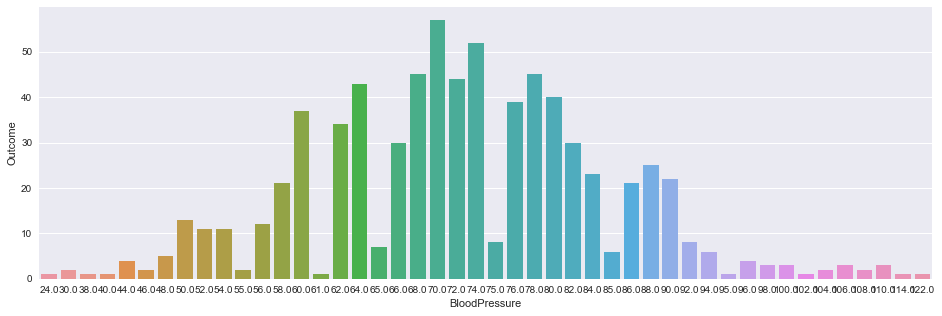

In [116]:
histvstarget("BloodPressure", "Outcome",data)

Center of mass towards the middle.

 ## SkinThickness

### Distribution

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

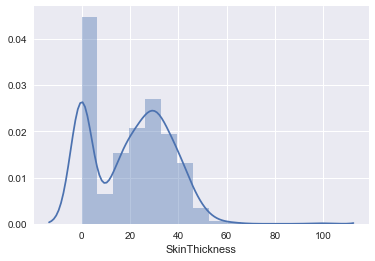

In [117]:
distribution("SkinThickness", data)
data["SkinThickness"].describe()

Again we are encountered with 0 values, a value of 0 skin thickness is not realistic. Replace it with NaN.

In [118]:
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["SkinThickness"].isnull().sum() # Number of missing values.

227

### Relationship to outcome

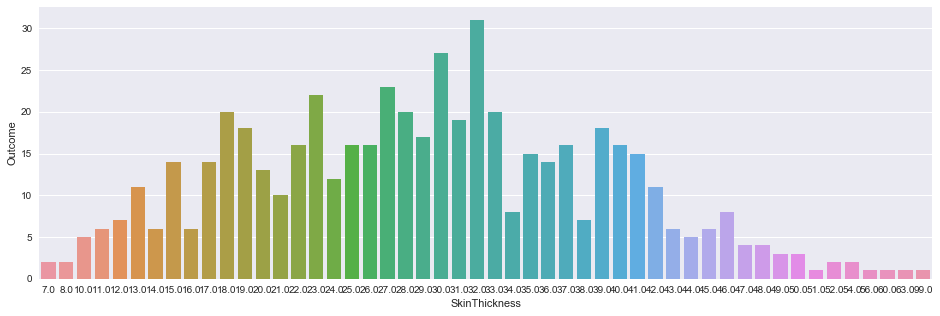

In [119]:
histvstarget("SkinThickness", "Outcome",data)

Center of mass towards the middle but with large variation. 

## Insulin

### Distribution

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

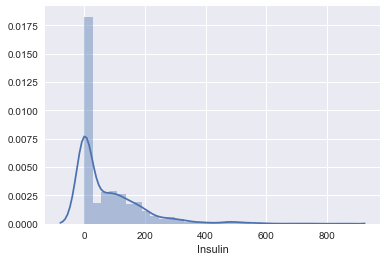

In [120]:
distribution("Insulin", data)
data["Insulin"].describe()

Again we have invalid zero values, replace with NaN.

In [121]:
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["Insulin"].isnull().sum() # Number of missing values.

374

### Relationship to outcome

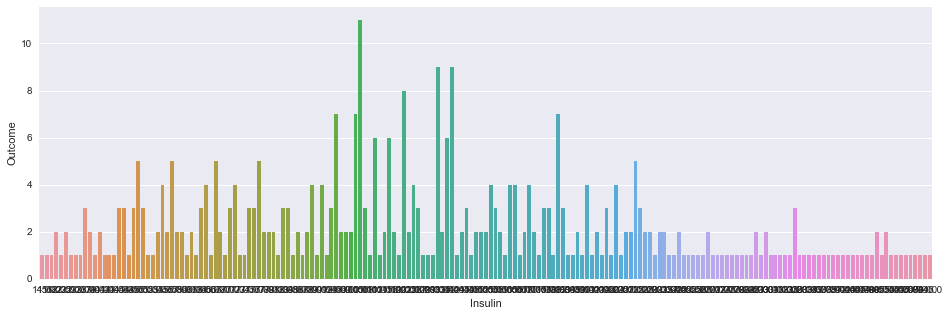

In [122]:
histvstarget("Insulin", "Outcome",data)

Almost completely uniform with some peaks, hard to draw any conclusions.

## BMI

### Distribution

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

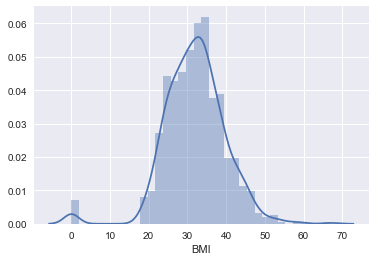

In [123]:
distribution("BMI", data)
data["BMI"].describe()

Missing values. Replace with NaN.

In [124]:
data["BMI"] = data["BMI"].replace(0, np.nan)
data["BMI"].isnull().sum() # Number of missing values.

11

### Relationship to outcome


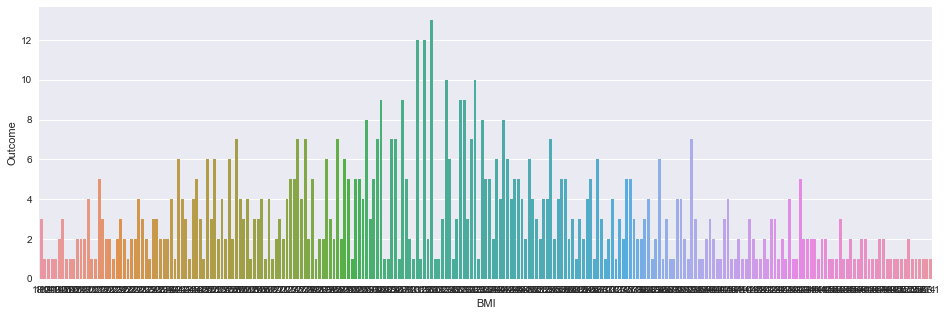

In [125]:
histvstarget("BMI", "Outcome",data)

Uniform with some peaks, some kind of centre of mass towards the middle.

## DiabetesPedigreeFunction

### Distribution

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

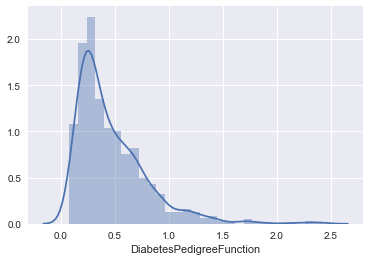

In [126]:
distribution("DiabetesPedigreeFunction", data)
data["DiabetesPedigreeFunction"].describe()

Distribution is positively skewed, and subject to outliers.

### Relationship to outcome

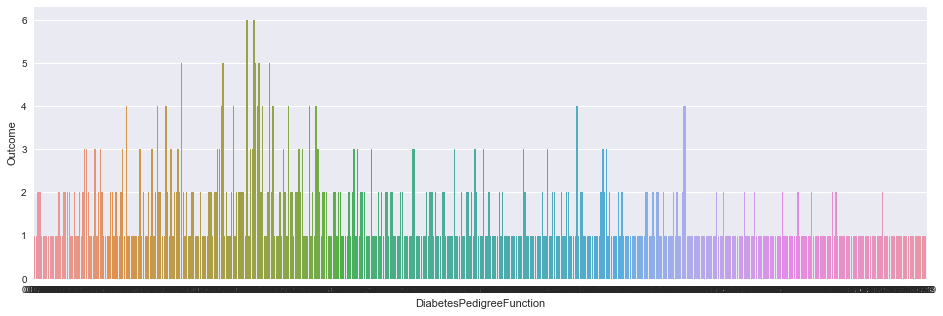

In [127]:
histvstarget("DiabetesPedigreeFunction", "Outcome",data)

Uniform but with some kind of centre of mass towards the left.

## Age

### Distribution

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

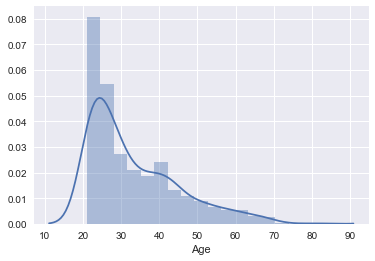

In [128]:
distribution("Age", data)
data["Age"].describe()

Distribution is positively skewed.

### Relationship to outcome

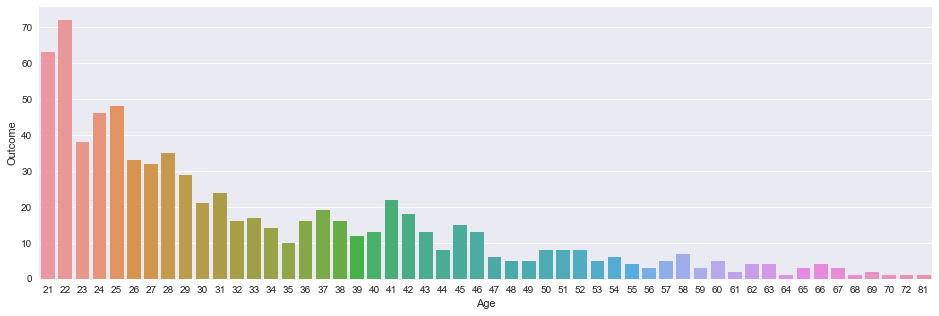

In [129]:
histvstarget("Age", "Outcome",data)

The outcome for diabetes looks more likely if you're younger.

# Correlation

In [130]:
datanoNan = data.dropna(axis=0) # Drop NaN's since not useful.
datanoNan.shape

(392, 9)

Unfortunatly we lost a lot of data dropping samples with missing values.

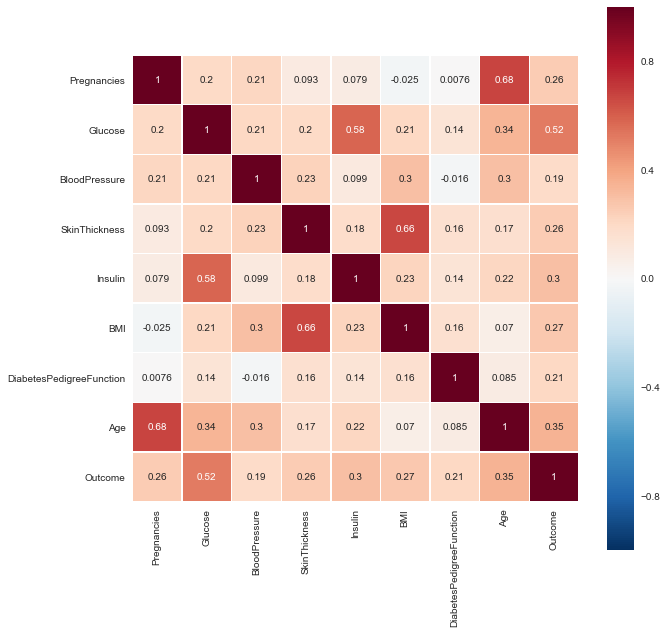

In [131]:
corrmat = datanoNan.corr() # Correlation matrix.
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

We notice high positive correlations between Age and pregnecies, which is logical. Also between BMI and Skin thickness, Glucose and Insulin as well as Glucose and Outcome.

# Attribute selection

Lets have a look at the importance of the attributes features for predicting the outcome. We might be able to remove attributes with a lot of missing values and hence increase our sample-size. We will use two different methods for the selection, one unsupervised that changes the attributes and one supervised that don't.

## Standardization

We normalize the data to reduce sensitivity to the scale of attributes. Both logistic regression and KNN is also sensitive to the realitive size between the attributes. In logistic regression the weights will be updated faster for large attributes and a small change in the weights for the large attribute will have an larger impact on the prediction. In KNN we are comparing distances and if one attribute is significantly larger then the others it will dominate the distances. 

In [173]:
test = datanoNan["Outcome"].astype(float)
train = datanoNan.drop(["Outcome"], axis=1)
train = train.apply(lambda x: (x - np.mean(x))/np.std(x)) # Z Standardization
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


## Pricipal component analysis.

In [88]:
import Utilities.mypca as PCA

The cumulative explained variance ratio as a function of the number of PC used:

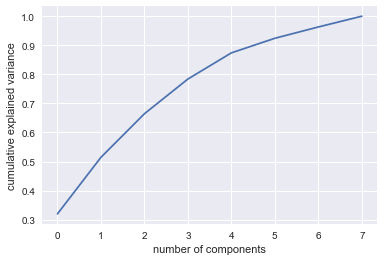

In [174]:
pca = PCA.MyPCA()
pca.fit(train)
plt.plot(np.cumsum(pca.explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

So the first 2 components contain about 66% of the variance. Lets try to plot the outcomes based on the two components.

(392, 2)


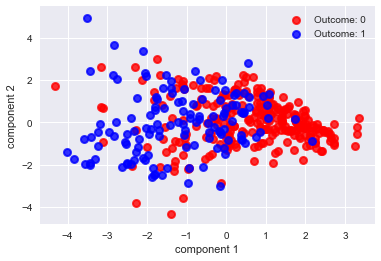

In [175]:
projected = pca.fit_transform(2, train)
print(projected.shape)

for color, i, t in zip(['red', 'blue'], [0, 1], test,):
    plt.scatter(projected[test == i, 0], projected[test == i, 1], color=color, alpha=.8, lw=2,
                label= "Outcome: " + str(i))
plt.legend(loc='best', scatterpoints=1)
plt.xlabel('component 1')
plt.ylabel('component 2')

This does separate the data to some degree, but not nearly enough. Instead we choose N=6, that should cover alomost 100 percent of the variance.

In [177]:
PCA_projected = pca.fit_transform(6, train)

Unfortunaly applying PCA mean we are losing the attribute interpretability and we cant remove any concrete attribute. This may also be a problem since we are looking at a possible explanation for diabetes, saying that is depends on combinations of linear combinations of the attrubites can be unuseful for a doctor. 

## Backward Attribute Elimination

In this method, we start with all n attributes. Then we compute some metric in some model n times, one for all combinations of n-1 attributes. We then look for the attribute which we can drop without making the metric more worse than dropping another. We do this recursevily finally leaving us with one attribute. Since we are not yet making any predictions or trying to build any models we use all of the data.

To be sure to prune of the correct attributes we look at the accuracy and zero-one loss using two different classifiers, logistic regression and a k-nearest neighbor classifier (should be fine since our number of dimensions is not that high (curse of dimensionality)).

#### Format of the output of the backward attribute elimination class.
From below:
The first tuple states that using all atributes we get this metric.
Going upwards the other tuples states that if we drop this attribute in addition to all of the above we get this metric. Hence in the last tuple the metric is NaN.

In [178]:
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import Utilities.bfe as bf
bfe = bf.BFE() # Create the backward attribute elimination class.
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [179]:
model = LogisticRegression()
bfe.apply(model,accuracy_score,train,test,loss = False)

[('Glucose', nan),
 ('Age', 0.7678571428571429),
 ('DiabetesPedigreeFunction', 0.78316326530612246),
 ('Pregnancies', 0.78826530612244894),
 ('SkinThickness', 0.79846938775510201),
 ('BloodPressure', 0.79591836734693877),
 ('Insulin', 0.79846938775510201),
 ('BMI', 0.79591836734693877),
 ('All attributes', 0.78316326530612246)]

In [180]:
bfe.apply(model,zero_one_loss,train,test,loss = True)

[('Glucose', nan),
 ('Age', 0.2321428571428571),
 ('DiabetesPedigreeFunction', 0.21683673469387754),
 ('Pregnancies', 0.21173469387755106),
 ('SkinThickness', 0.20153061224489799),
 ('BloodPressure', 0.20408163265306123),
 ('Insulin', 0.20153061224489799),
 ('BMI', 0.20408163265306123),
 ('All attributes', 0.21683673469387754)]

Logistic regression agrees with both metrics that the imporartance order is as printed with Glucose as most important and BMI as the least important attribute. The error or accuracy get better if we drop BMI in both cases and doesn't really get worse until we drop everything and one of Glucose, Age, DiabetesPedigreeFunction and Pregnancies.

In [181]:
model = KNeighborsClassifier(n_neighbors = 6, p = 2) # K-nearest-neighbour using euclidian distance.
bfe.apply(model,accuracy_score,train,test,loss = False)

[('Glucose', nan),
 ('Pregnancies', 0.80612244897959184),
 ('Age', 0.82653061224489799),
 ('Insulin', 0.82653061224489799),
 ('SkinThickness', 0.84693877551020413),
 ('BMI', 0.81887755102040816),
 ('DiabetesPedigreeFunction', 0.81887755102040816),
 ('BloodPressure', 0.82653061224489799),
 ('All attributes', 0.82397959183673475)]

In [183]:
bfe.apply(model,zero_one_loss,train,test,loss = True)

[('Glucose', nan),
 ('Pregnancies', 0.19387755102040816),
 ('Age', 0.17346938775510201),
 ('Insulin', 0.17346938775510201),
 ('SkinThickness', 0.15306122448979587),
 ('BMI', 0.18112244897959184),
 ('DiabetesPedigreeFunction', 0.18112244897959184),
 ('BloodPressure', 0.17346938775510201),
 ('All attributes', 0.17602040816326525)]

K-nearest-neighbour also agrees with both metrics that the imporartance order is as printed with Glucose as most important and BloodPresssure as the least important attribute. The error or accuracy is superior when we are using Glucose, Pregnancies, Age, Insulin and SkinThickness

So if we take the union of the both subsets we get the new set: Glucose, Pregnancies, Age, Insulin, SkinThickness and DiabetesPedigreeFunction. Hence we drop BloodPressure and BMI. Note that both models agrees one that Glucose, Age and Pregnancies are very important to predict diabetes.

# Reevaluating the data
Since we dropped some attributes it's worthwile to take another look at the date.

In [189]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Unfortunatly neighter BMI or Bloodpressure have significantly high number of missing values.

In [190]:
newdata = data.drop(["BMI","BloodPressure"], axis=1)
newdata.dropna(axis=0,inplace=True)
print("Before attribute selection", datanoNan.shape)
print("After attribute selection", newdata.shape)

Before attribute selection (392, 9)
After attribute selection (393, 7)


1 more samples.

It is still interesting though, to look at the most important attributes presented during BFE: Glucose, Age and Pregnancies. Since the dimension here is 3, making it visualizable (huge advantage) and the fact that Age and Pregnancies of the attributes has no missing values and Glucose only 5.

In [196]:
newdata_3d = data.copy()[["Glucose", "Age","Pregnancies","Outcome"]]
newdata_3d.dropna(axis=0, inplace=True)
d3_test = newdata_3d["Outcome"]
d3_train = newdata_3d.drop(["Outcome"],axis=1)
d3_train = d3_train.apply(lambda x: (x - np.mean(x))/np.std(x)) # Z Standardization
print("Before attribute selection", data.shape)
print("After attribute selection", newdata_3d.shape)

Before attribute selection (768, 9)
After attribute selection (763, 4)


<IPython.core.display.Javascript object>


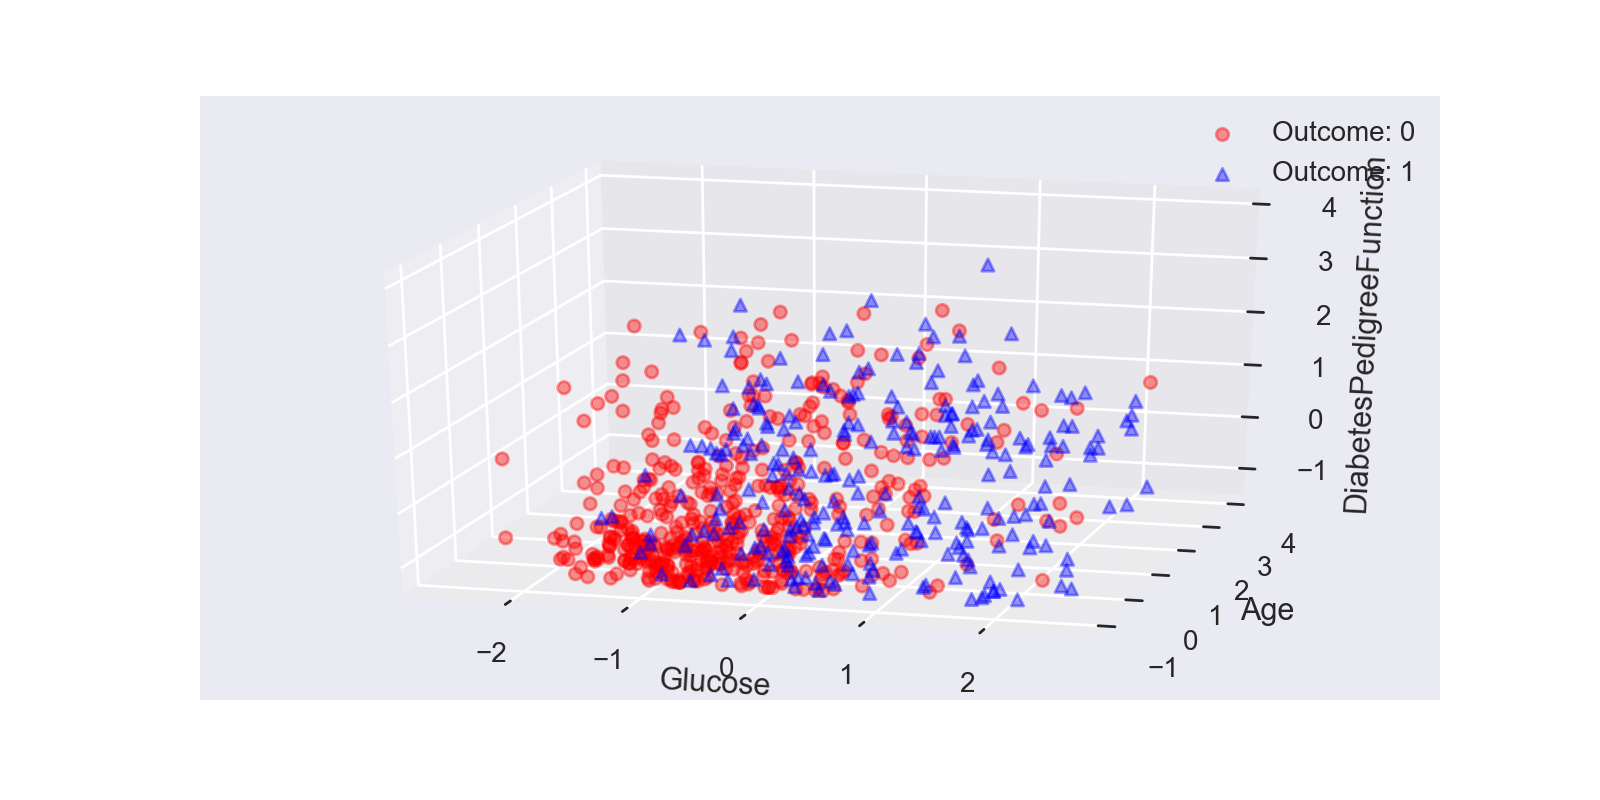

In [198]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (8.0, 4.0)
ax = plt.axes(projection='3d')
for color, i, t, mark in zip(['red', 'blue'], [0, 1], d3_test.values,['o','^']):
    ax.scatter(d3_train.values[d3_test.values == i,0], d3_train.values[d3_test.values == i,1], 
                d3_train.values[d3_test.values == i,2], color = color, lw = 1, alpha = 0.4, label= "Outcome: " + str(i)
              ,marker = mark)
ax.legend(loc='best', scatterpoints=1)
ax.set_xlabel('Glucose')
ax.set_ylabel('Age')
ax.set_zlabel('DiabetesPedigreeFunction')


By eye it does look like a better seperation than the 2-dimensional PCA, but nowhere near perfect.


# Moving on

Lets move on by trying to establish a baseline for the problem and decide on which version of the dataset to use.
The work continous in Notebook xxxxxx

Saving the dataset with missing values properly labeled

In [47]:
data.to_csv('input/Diabetes_MissingvalesLabeled.csv', index=False)